In [1]:
import pandas as pd
import numpy as np
import re
import glob
import os
import datetime
import matplotlib.pyplot as plt
import itertools

### env variables

In [2]:
BASE_PATH = '../data/pcs-scraping'
RESULTS_PATH = '../data/pcs-scraping/results/rider'
RANKINGS_PATH = '../data/pcs-scraping/pcs-rankings/rider'
TEAMS_PATH = '../data/pcs-scraping/teams/rider'
CALENDARS_PATH = '../data/pcs-scraping/calendars'
STARTLISTS_PATH = '../data/pcs-scraping/startlists'
RACERESULTS_PATH = '../data/pcs-scraping/race_results'
IMG_PATH = '../data/pcs-scraping/img/rider'
RIDERSTATS_PATH = '../data/pcs-scraping/rider_stats/rider'

### Load data

In [3]:
rider_names = list(pd.read_csv('../data/pcs-scraping/rider_names.csv'))

In [12]:
race = 'milano-sanremo'
year = '2022'
stats = pd.read_csv(os.path.join(STARTLISTS_PATH, race, year, 'stats-kpis.csv'))

### Clean data

In [26]:
stats.dropna(inplace=True)
stats = stats[stats['Height▲▼'] != 0]
stats = stats[stats['Weight▲▼'] != 0]

### Plot data

In [28]:
stats.columns

Index(['#', 'Rider', 'Career points▲▼', 'GC points▲▼', 'Classic points▲▼',
       'TT points▲▼', 'Climbers points▲▼', 'Sprinters points▲▼', 'Height▲▼',
       'Weight▲▼'],
      dtype='object')

In [31]:
stats[['Rider', 'Career points▲▼', 'Height▲▼', 'Weight▲▼']].sort_values(by='Career points▲▼', ascending=False).head()

,Rider,Career points▲▼,Height▲▼,Weight▲▼
118,SAGAN Peter,22880,1.82,78
56,GILBERT Philippe,20430,1.78,75
145,VAN AVERMAET Greg,18534,1.81,74
75,KRISTOFF Alexander,16333,1.81,78
13,BOASSON HAGEN Edvald,13495,1.85,75


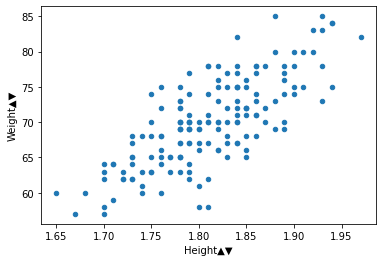

In [27]:
stats[['Rider', 'Height▲▼', 'Weight▲▼']].plot(kind='scatter', x='Height▲▼', y='Weight▲▼')
plt.show()

In [35]:
df_sorted['Rider']

118                 SAGAN Peter
56             GILBERT Philippe
145           VAN AVERMAET Greg
75           KRISTOFF Alexander
13         BOASSON HAGEN Edvald
                 ...           
42               ELOSEGUI Iñigo
126         SEVILLA Diego Pablo
34                 DAVY Clément
41                EL GOUZI Omar
165    ZURITA Ricardo Alejandro
Name: Rider, Length: 164, dtype: object

In [38]:
for i, x in df_sorted.iterrows():
    print(x)
    break

Rider              SAGAN Peter
Career points▲▼          22880
Height▲▼                  1.82
Weight▲▼                    78
Name: 118, dtype: object


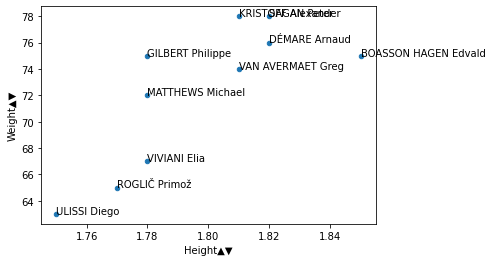

In [44]:
df_sorted = stats[['Rider', 'Career points▲▼', 'Height▲▼', 'Weight▲▼']].sort_values(by='Career points▲▼', ascending=False).iloc[:10]
df_sorted.plot(kind='scatter', x='Height▲▼', y='Weight▲▼')

for i, x in df_sorted.iterrows():
    plt.text(x=x['Height▲▼'], y=x['Weight▲▼'], s=x['Rider'])
    
plt.show()

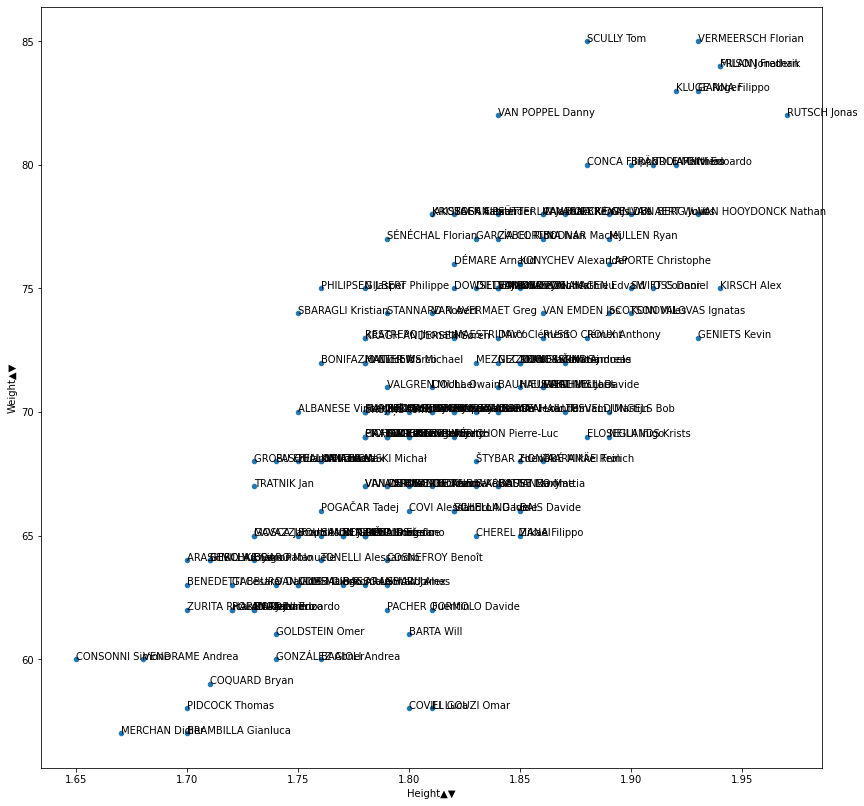

In [47]:
fig, ax = plt.subplots(figsize=(14,14))

df_sorted = stats[['Rider', 'Career points▲▼', 'Height▲▼', 'Weight▲▼']].sort_values(by='Career points▲▼', ascending=False)
df_sorted.plot(kind='scatter', x='Height▲▼', y='Weight▲▼', ax=ax)

for i, x in df_sorted.iterrows():
    ax.text(x=x['Height▲▼'], y=x['Weight▲▼'], s=x['Rider'])
    
plt.show()

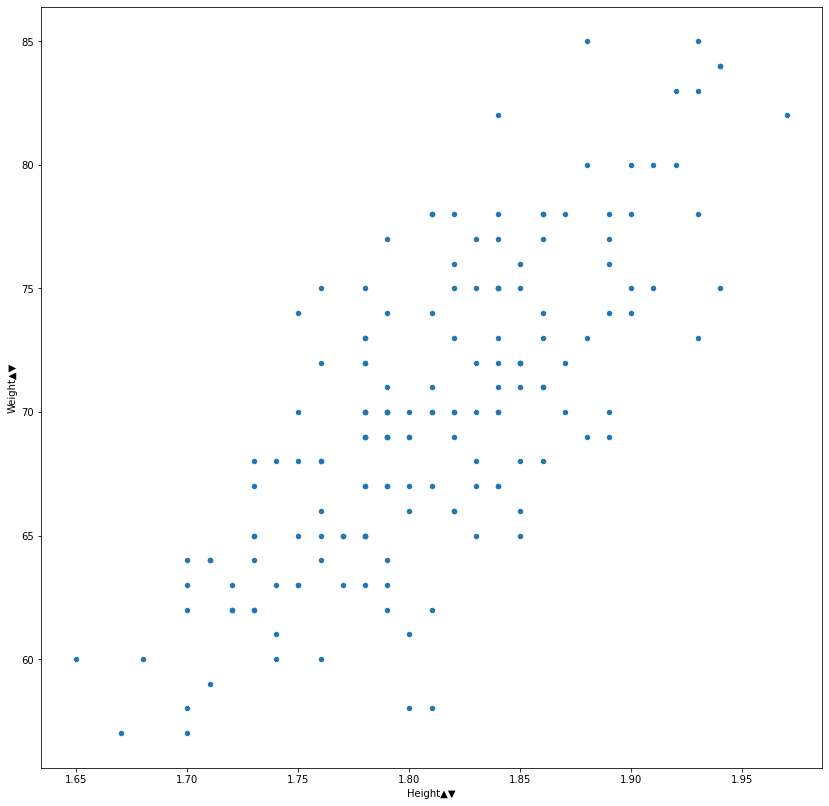

In [48]:
fig, ax = plt.subplots(figsize=(14,14))

df_sorted = stats[['Rider', 'Career points▲▼', 'Height▲▼', 'Weight▲▼']].sort_values(by='Career points▲▼', ascending=False)
df_sorted.plot(kind='scatter', x='Height▲▼', y='Weight▲▼', ax=ax)
    
plt.show()

# K-Means clustering

In [60]:
import seaborn as sns

In [49]:
from sklearn.cluster import KMeans

### Height and Weight

In [110]:
X = stats[['Height▲▼', 'Weight▲▼']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [111]:
clusters = stats[['Rider', 'Height▲▼', 'Weight▲▼']].copy()
clusters['cluster'] = kmeans.labels_

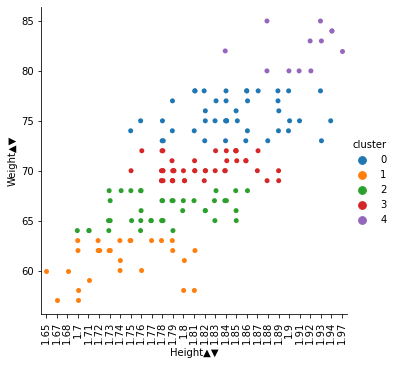

In [112]:
sns.catplot(x='Height▲▼',
            y='Weight▲▼',
            data=clusters[['Height▲▼', 'Weight▲▼', 'cluster']],
            hue='cluster')

#df_clusters_groupby = clusters.groupby('cluster').first()
#for i, x in df_clusters_groupby.iterrows():
#    plt.text(x=x['Height▲▼'], y=x['Weight▲▼'], s=x['Rider'])

plt.xticks(rotation=90)
plt.show()

In [87]:
kmeans.cluster_centers_

array([[ 1.84666667, 75.54761905],
       [ 1.73925926, 61.        ],
       [ 1.78125   , 66.075     ],
       [ 1.81651163, 70.30232558],
       [ 1.91333333, 82.33333333]])

### Top 20 vs bottom 20 - PCS career points

In [133]:
X_1 = stats[['Career points▲▼', 'Weight▲▼']].sort_values(by='Career points▲▼').iloc[:20]
X_2 = stats[['Career points▲▼', 'Weight▲▼']].sort_values(by='Career points▲▼').iloc[-20:]
X = pd.concat([X_1, X_2])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [134]:
clusters = X.copy()
clusters['cluster'] = kmeans.labels_
clusters['Rider'] = stats.loc[X.index]['Rider']
clusters.head()

,Career points▲▼,Weight▲▼,cluster,Rider
165,5,62,1,ZURITA Ricardo Alejandro
41,23,58,1,EL GOUZI Omar
34,31,73,1,DAVY Clément
126,31,64,1,SEVILLA Diego Pablo
42,35,69,1,ELOSEGUI Iñigo


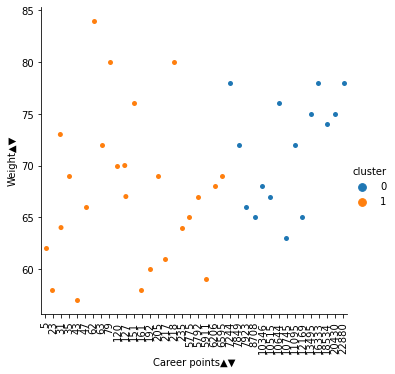

In [135]:
sns.catplot(x='Career points▲▼',
            y='Weight▲▼',
            data=clusters[['Career points▲▼', 'Weight▲▼', 'cluster']],
            hue='cluster')

#df_clusters_groupby = clusters.groupby('cluster').first()
#for i, x in df_clusters_groupby.iterrows():
#    plt.text(x=x['Height▲▼'], y=x['Weight▲▼'], s=x['Rider'])

plt.xticks(rotation=90)
plt.show()

### Model with all features (kpis) with 3 classes (low, intermediate, high)

In [137]:
X = stats[['Career points▲▼', 'GC points▲▼', 'Classic points▲▼',
       'TT points▲▼', 'Climbers points▲▼', 'Sprinters points▲▼', 'Height▲▼',
       'Weight▲▼']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

clusters = stats[['Rider', 'Career points▲▼', 'GC points▲▼', 'Classic points▲▼',
       'TT points▲▼', 'Climbers points▲▼', 'Sprinters points▲▼', 'Height▲▼',
       'Weight▲▼']].copy()
clusters['cluster'] = kmeans.labels_

In [141]:
from sklearn.manifold import TSNE
import plotly.express as px

In [153]:
features = clusters[['Career points▲▼', 'GC points▲▼', 'Classic points▲▼',
       'TT points▲▼', 'Climbers points▲▼', 'Sprinters points▲▼', 'Height▲▼',
       'Weight▲▼', 'cluster']]

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=features.cluster, labels={'color': 'cluster'}
)
fig.show()

In [156]:
clusters.groupby('cluster').head(4)

,Rider,Career points▲▼,GC points▲▼,Classic points▲▼,TT points▲▼,Climbers points▲▼,Sprinters points▲▼,Height▲▼,Weight▲▼,cluster
0,AFFINI Edoardo,652,145,60,1087,7,136,1.92,80,0
1,ALBANESE Vincenzo,665,59,499,30,298,428,1.75,70,0
3,ARANBURU Alex,1681,303,807,190,1184,454,1.78,63,0
4,ARASHIRO Yukiya,2757,1166,1265,122,556,1178,1.70,64,0
13,BOASSON HAGEN Edvald,13495,3560,4083,2957,3482,6304,1.85,75,1
17,BOUHANNI Nacer,8708,462,4303,51,1376,8280,1.75,65,1
20,CARUSO Damiano,5792,3411,796,889,3977,636,1.79,67,1
29,COQUARD Bryan,5911,1017,2341,289,926,5354,1.71,59,1
56,GILBERT Philippe,20430,3960,12347,1423,6512,6093,1.78,75,2
75,KRISTOFF Alexander,16333,2086,8983,297,2418,9827,1.81,78,2


# Predict rider potential based on model

# Radar Chart